Logistic Regression (binary classification)

Using heart.csv from https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility?select=heart.csv



In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

%matplotlib notebook

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive

Mounted at /gdrive
/gdrive/MyDrive


Heart.csv

Attribute Information

1) age 
2) sex 
3) chest pain type *(4 values)* 
4) resting blood pressure 
5) serum cholestoral in mg/dl
6)fasting blood sugar > 120 mg/dl
7) resting electrocardiographic results (values 0,1,2)
8) maximum heart rate achieved
9) exercise induced angina
10) oldpeak = ST depression induced by exercise relative to rest
11)the slope of the peak exercise ST segment
12) number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14) target: 0= less chance of heart attack 1= more chance of heart attack



In [3]:
# create dataframe from csv file
heart_data = pd.read_csv('./data-science/heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


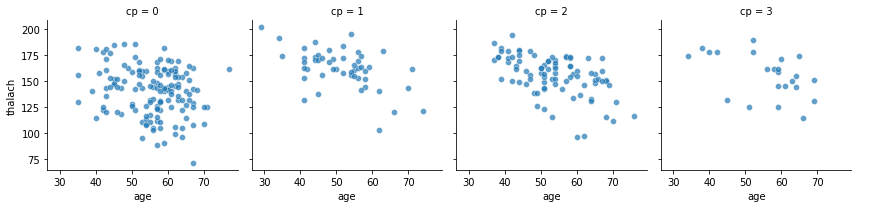

In [4]:
%matplotlib inline

# Analyse data
# Chest pain type (cp) group
# Age VS maximum heart rate (thalach) = -0.4 trend
g = sns.FacetGrid(heart_data, col="cp")
g.map(sns.scatterplot, "age", "thalach", alpha=.7)
g.add_legend()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


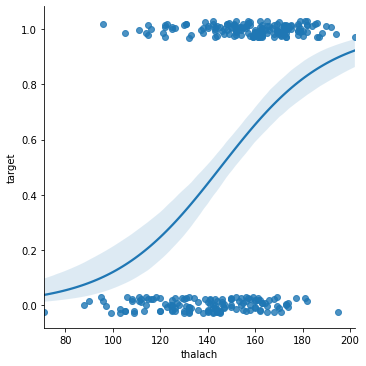

In [ ]:
# view of logistic regression with only thalach feature
# thalach = maximum heart rate achieved 
sns.lmplot(x="thalach", y="target", data=heart_data,
           logistic=True, y_jitter=.03);

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'sex'),
 Text(2.5, 0, 'cp'),
 Text(3.5, 0, 'trestbps'),
 Text(4.5, 0, 'chol'),
 Text(5.5, 0, 'fbs'),
 Text(6.5, 0, 'restecg'),
 Text(7.5, 0, 'thalach'),
 Text(8.5, 0, 'exang'),
 Text(9.5, 0, 'oldpeak'),
 Text(10.5, 0, 'slope'),
 Text(11.5, 0, 'ca'),
 Text(12.5, 0, 'thal'),
 Text(13.5, 0, 'target')]

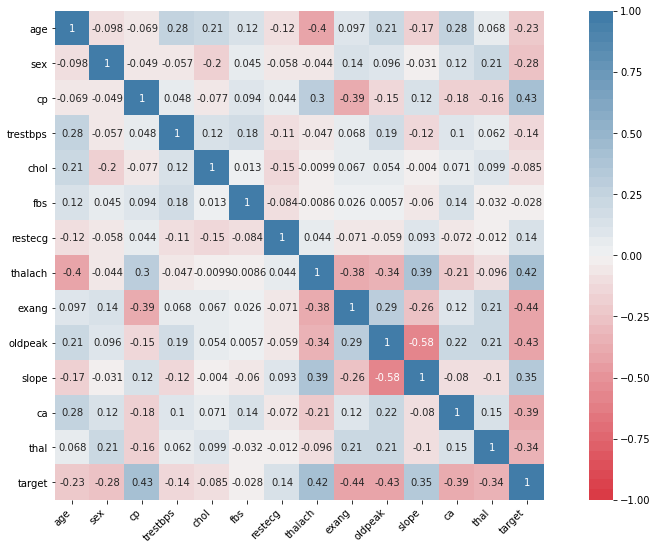

In [ ]:
# correlation matrix - all features
# Correlation ranges from -1 to +1. 
# Values closer to zero means there is no linear trend between the 2 variables. 
# Close to 1, more positive correlation, # –1 indicates a perfect negative corr.

corr = heart_data.corr()
plt.figure(figsize=(16,9))
ax = sns.heatmap(
    corr, 
    annot = True,     
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 240, n=50),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [5]:
# Drop 2 features with poor correlation with target
heart_part=heart_data.drop(columns=['fbs', 'chol'])

In [6]:
# X features and Y labels
X=heart_part.drop(columns=['target'])
Y=heart_part['target']

In [7]:
# Build train and test datasets
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0)

check whether the data is equally splitted or not.

Because if data is not splitted equally it will cause, **class imbalacing** problem

In [ ]:
from collections import Counter

print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 105, 1: 122})

In [8]:
# Scale the X data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0]

array([ 0.35256528,  0.70243936,  0.9870291 ,  0.02020565, -0.9825655 ,
        1.01189274, -0.72352604,  1.72483977,  0.96222601,  1.22723311,
        1.12135917])

In [9]:
# build logistic regression model, train and predict test data
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

In [15]:
# import data modeling metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confusion matrix
[[24  9]
 [ 4 39]]


Accuracy of Logistic Regression: 82.89473684210526 

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.81      0.91      0.86        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



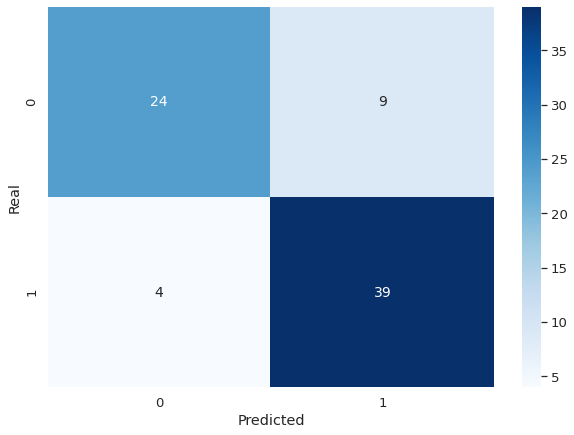

In [11]:
# Confusion matrix with Seaborn
# important in deseases have a high Recall (TP/TP+FN) !!
# in this case 
df_cm = pd.DataFrame(lr_conf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Real'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})

In [14]:
# The recall is important in this health problem (more recall-oriented)
# So, use cross_val_score to obtain a mean of 5 (cv) different train/test datasets
recalls = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
print('Recalls', np.mean(recalls), recalls)

Recalls 0.8773333333333333 [0.76       0.96       0.91666667 0.875      0.875     ]


In [20]:
# obtain prediction for each row of X_test
predictions = model.predict_proba(X_test)
# build roc_curve values with y_test and probability 
# predictions of 1 value class (more chance heart attack)
fpr, recall, thresholds = roc_curve(y_test, predictions[:, 1])

In [29]:
print(predictions[:, 1])

[0.02192214 0.74387838 0.80522061 0.0184778  0.11036576 0.41479744
 0.05379813 0.09934224 0.00722279 0.00740901 0.72229811 0.94924049
 0.03099563 0.85037972 0.96630426 0.67849745 0.114771   0.81892276
 0.00933034 0.8450253  0.79473458 0.31346737 0.10966448 0.11541851
 0.88756252 0.6600444  0.16890807 0.36705526 0.98261413 0.63103514
 0.52208922 0.02041603 0.97957689 0.75611915 0.91533629 0.65101394
 0.03773694 0.86482672 0.09686549 0.14127584 0.69886489 0.85332135
 0.41446367 0.08891164 0.51899335 0.6745181  0.77237242 0.60746075
 0.08950857 0.82302298 0.88774638 0.66326615 0.97766421 0.85890256
 0.99545578 0.10473458 0.96222423 0.92512462 0.79691152 0.96134726
 0.7849968  0.98686515 0.93145456 0.90682044 0.74256767 0.62924643
 0.79897148 0.21204813 0.71650215 0.54192472 0.39426175 0.93776465
 0.81168829 0.04077283 0.07020096 0.86551504]


In [22]:
# compute Area Under the Roc Curve
roc_auc = auc(fpr, recall)

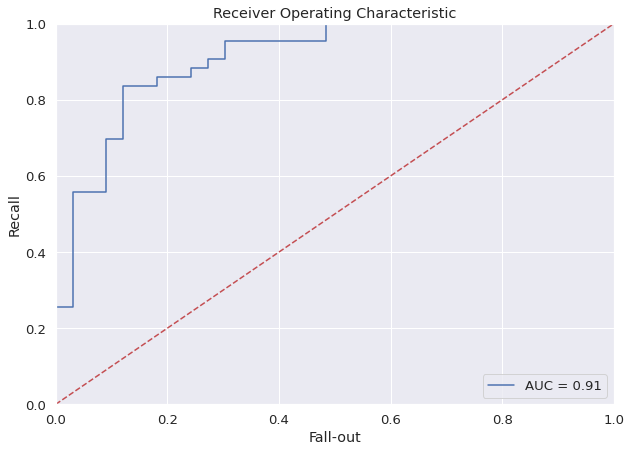

In [26]:
%matplotlib inline
# Plot Roc-Auc
plt.figure(figsize = (10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,recall,'b',label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Fall-out')
plt.ylabel('Recall')
plt.show()

In [ ]:
# Evaluate with an SVC model 
from sklearn.svm import SVC

svc =  SVC(kernel='rbf', C=1)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[24  9]
 [ 3 40]]


Accuracy of Support Vector Classifier: 84.21052631578947 

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        33
           1       0.82      0.93      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.83        76
weighted avg       0.85      0.84      0.84        76

